# 研究室プロジェクトMNIST deepLearnign

In [1]:
# 必要なライブラリのインポート
import keras
from keras.datasets import mnist
# Jupyter notebookを利用している際に、notebook内にplot結果を表示するようにする
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割
(x_train, y_train), (x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


In [2]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
# 2次元データを数値に変換
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 型変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする
x_train /= 255
x_test /= 255

### one hot encoding
#### 10クラスあるので、政界のラベルのクラスを１にしてそれ以外を０にする。元は、正解のラベルだけのデータだったが、それを10*1の行列にして、正解のラベルだけ１、その他を０にする操作。
#### ex label=1 ~ [0,1,0,0,~~,0]

In [4]:
# one-hot encodingを施すためのメソッド
from keras.utils.np_utils import to_categorical
# クラス数は10
num_classes = 10
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test =  to_categorical(y_test, num_classes)

### deep learning 

# めも
sequential そうを線形に積むモデル  
Dense そうを作る  
activation 活性化関数名  
relu max(0,x)　早いらしいよ  
dropout 過学習を防ぐ。ランダムに入力を０にする。  


In [5]:
# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# めも
バッチサイズ　データを塊としてまとめて扱う　　
エポック数　学習の繰り返し回数  
損失関数　正解との差を最小化する。その指標　　
optimizer 勾配(重み）の更新の手法を選択


In [7]:
# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.2525 - acc: 0.9240 - val_loss: 0.1114 - val_acc: 0.9653
Epoch 2/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.1003 - acc: 0.9688 - val_loss: 0.0769 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0721 - acc: 0.9766 - val_loss: 0.0853 - val_acc: 0.9739
Epoch 4/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0578 - acc: 0.9816 - val_loss: 0.0664 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0466 - acc: 0.9847 - val_loss: 0.0641 - val_acc: 0.9807
Epoch 6/20
60000/60000 [==============================] - 13s 212us/step - loss: 0.0375 - acc: 0.9879 - val_loss: 0.0764 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.0347 - acc: 0.9888 - val_loss: 0.

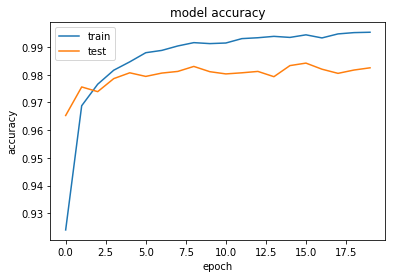

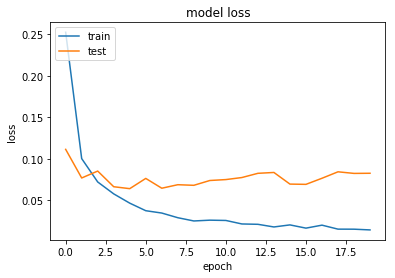

In [8]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### confusion matrixc 

In [9]:
#confusion matrix
y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
pred = model.predict_classes(x_test)

In [11]:
metrics.confusion_matrix(y_test.argmax(axis=1),pred)

array([[ 972,    1,    0,    1,    0,    1,    1,    2,    1,    1],
       [   0, 1131,    0,    1,    0,    1,    0,    1,    1,    0],
       [   3,    1, 1013,    1,    1,    0,    4,    5,    4,    0],
       [   2,    0,    3,  986,    0,    8,    0,    6,    3,    2],
       [   0,    1,    3,    0,  971,    0,    3,    0,    0,    4],
       [   1,    0,    0,    3,    1,  880,    3,    1,    2,    1],
       [   5,    4,    0,    0,    7,    5,  936,    0,    1,    0],
       [   0,    3,    5,    0,    0,    0,    0, 1011,    2,    7],
       [   6,    0,    3,    3,    5,    3,    1,    3,  944,    6],
       [   1,    3,    1,    2,   13,    3,    0,    3,    2,  981]])